In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns


In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
sns.pairplot(data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000027ECE3DECB0> (for post_execute):


KeyboardInterrupt: 

In [8]:
data1=data[['LSTAT','MEDV']]
data2=data[['RM','MEDV']]
data2=data2.rename(columns={'RM':'x', 'MEDV':'y'})
data3=data2

In [10]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
x=data2['x']
y=data2['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [16]:
data2=pd.DataFrame({'x':x_train.squeeze(),'y':y_train.squeeze()})
data2

data3=pd.DataFrame({'x':x_test.squeeze(),'y':y_test.squeeze()})
data3

,x,y
173,6.416,23.6
274,6.758,32.4
491,5.983,13.6
72,6.065,22.8
452,6.297,16.1
...,...,...
441,6.406,17.1
23,5.813,14.5
225,8.725,50.0
433,6.436,14.3


In [17]:
data2.head()
data2['x2']=data2['x']*data2['x']
data2['x3']=data2['x']*data2['x2']
data2['x4']=data2['x']*data2['x3']
data2['xy']=data2['x']*data2['y']
data2['x2y']=data2['x2']*data2['y']

In [18]:
sumx=data2['x'].sum()
sumx2=data2['x2'].sum()
sumx3=data2['x3'].sum()
sumx4=data2['x4'].sum()
sumy=data2['y'].sum()
sumxy=data2['xy'].sum()
sumx2y=data2['x2y'].sum()
n=data2['x'].count()

In [19]:
n

354

In [20]:
data2.head()

,x,y,x2,x3,x4,xy,x2y
5,6.430,28.7,41.344900,265.847707,1709.400756,184.5410,1186.598630
116,6.176,21.2,38.142976,235.571020,1454.886618,130.9312,808.631091
45,5.682,19.3,32.285124,183.444075,1042.329232,109.6626,623.102893
16,5.935,23.1,35.224225,209.055775,1240.746027,137.0985,813.679597
468,5.926,19.1,35.117476,208.106163,1233.237121,113.1866,670.743792


In [21]:
print(sumx,sumy,sumx2,sumx3,sumx4,sumxy,sumx2y)

2239.288 8147.6 14347.59647 93122.79332965 612439.8617132099 53203.961800000005 352460.99008500006


In [48]:
A=np.array([[sumx2,sumx,n],[sumx3,sumx2,sumx],[sumx4,sumx3,sumx2]])
B=np.array([sumy,sumxy,sumx2y])

coff=np.linalg.solve(A,B)
coff

array([  2.181199  , -19.12845562,  55.61231071])

In [50]:
A2=np.array([[sumx,n],[sumx2,sumx]])
B2=np.array([sumy,sumxy])
coff2=np.linalg.solve(A2,B2)
coff2

array([  9.1181022 , -34.66230744])

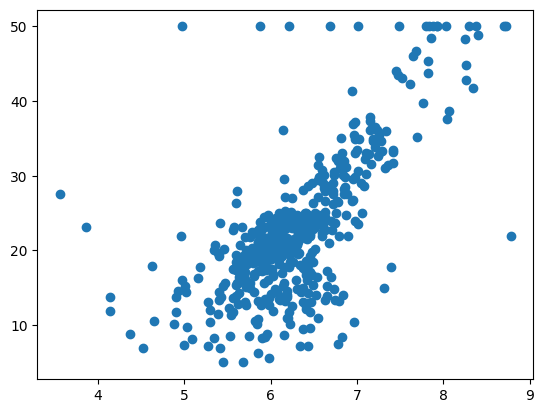

In [51]:
plt.scatter(data['RM'],data['MEDV'])


In [47]:
# Predicted Quadratic Function
def soln(x):
    y=coff[0]*(x**2)+coff[1]*x+coff[2]
    return y



In [ ]:
#Predicted Linear Function
def soln2(x):
    y=coff2[0]*x+coff2[1]
    return y

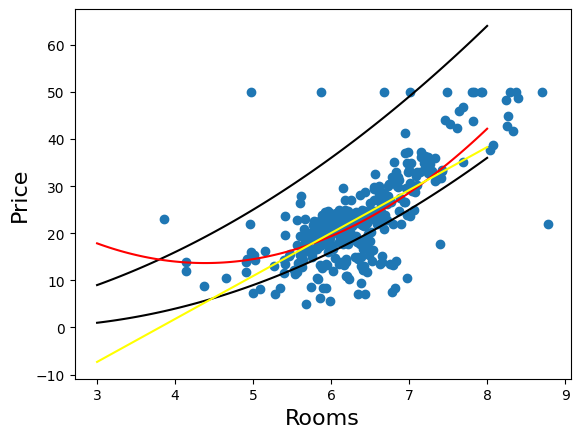

In [57]:

array=np.linspace(3,8,100)
plt.xlabel("Rooms",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.scatter(data2['x'],data2['y'])
plt.plot(array,np.vectorize(lambda x:((x)**2)/1)(array),'black')
plt.plot(array,np.vectorize(lambda x:((x-2)**2)/1)(array),'black')
plt.plot(array,np.vectorize(soln)(array),'r')
plt.plot(array,np.vectorize(soln2)(array),'yellow')

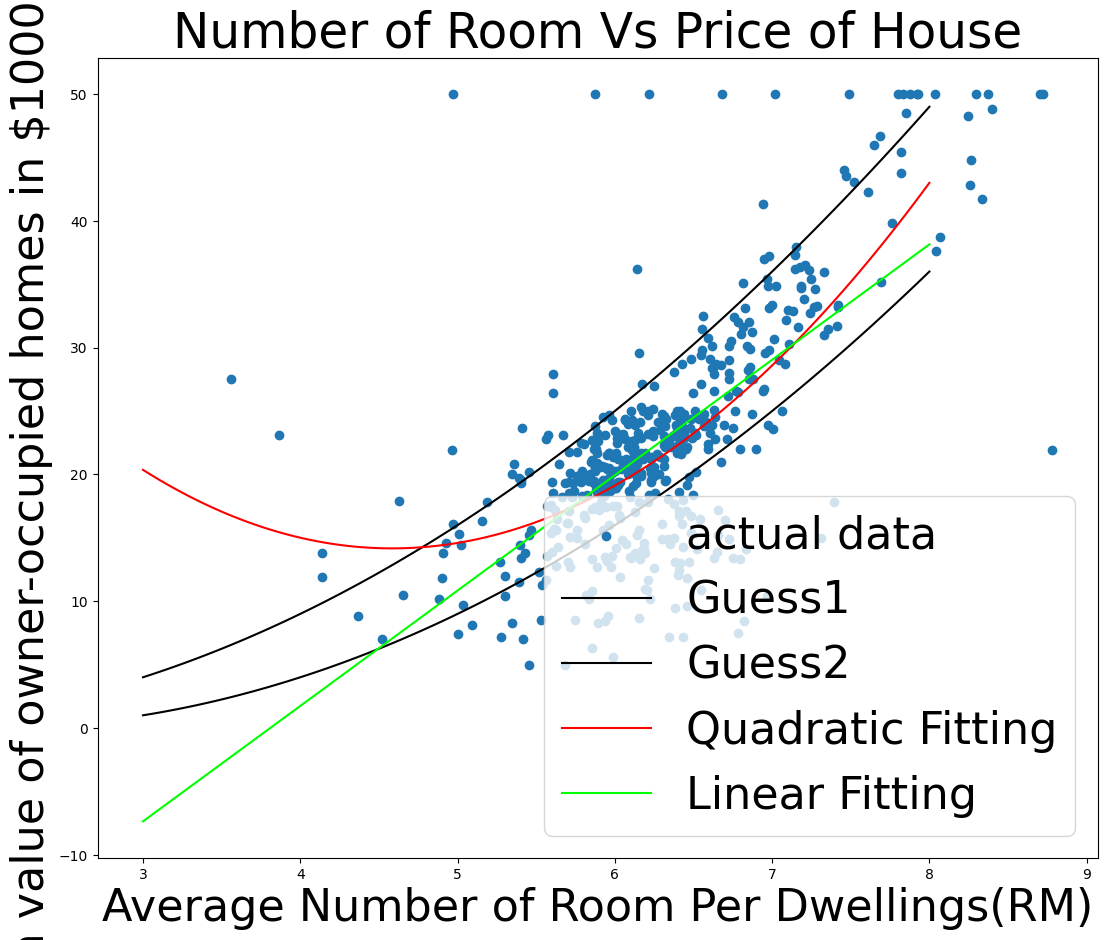

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Average Number of Room Per Dwellings(RM)",fontsize=32)
ax.set_ylabel("Median value of owner-occupied homes in $1000'(MEDV)",fontsize=32)
ax.set_title("Number of Room Vs Price of House",fontsize=35)
ax.scatter(data2['x'],data2['y'],label="actual data")
ax.plot(array,np.vectorize(lambda x:((x-1)**2))(array),'black',label="Guess1")
ax.plot(array,np.vectorize(lambda x:((x-2)**2))(array),'black',label="Guess2")
ax.plot(array,np.vectorize(soln)(array),'r',label="Quadratic Fitting")
ax.plot(array,np.vectorize(soln2)(array),'lime',label="Linear Fitting")
ax.legend(loc=4,fontsize=32)

In [58]:
data3['ylin']=data3['x'].apply(soln2)
data3['yquad']=data3['x'].apply(soln)
data3['errorlin']=data3['y']-data3['ylin']
data3['errorquad']=data3['y']-data3['yquad']
data3.head()

,x,y,ylin,yquad,errorlin,errorquad
173,6.416,23.6,23.839436,22.673319,-0.239436,0.926681
274,6.758,32.4,26.957827,25.958796,5.442173,6.441204
491,5.983,13.6,19.891298,19.245591,-6.291298,-5.645591
72,6.065,22.8,20.638982,19.831942,2.161018,2.968058
452,6.297,16.1,22.754382,21.649784,-6.654382,-5.549784


In [54]:
data3['x'].count()

152

In [59]:
rsmelin=np.sqrt(((data3['errorlin']**2).sum())/data3['x'].count())
rsmelin

6.35227909477166

In [56]:
rsmequad=np.sqrt(((data3['errorquad']**2).sum())/data3['x'].count())
rsmequad

5.670246665948749

In [60]:
data3.head()

,x,y,ylin,yquad,errorlin,errorquad
173,6.416,23.6,23.839436,22.673319,-0.239436,0.926681
274,6.758,32.4,26.957827,25.958796,5.442173,6.441204
491,5.983,13.6,19.891298,19.245591,-6.291298,-5.645591
72,6.065,22.8,20.638982,19.831942,2.161018,2.968058
452,6.297,16.1,22.754382,21.649784,-6.654382,-5.549784


In [ ]:
data3['y'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: y, dtype: float64

In [ ]:
data2['y_predict'].describe()

count    506.000000
mean      22.532806
std        6.810986
min       14.171890
25%       18.354821
50%       20.690244
75%       24.447407
max       57.668899
Name: y_predict, dtype: float64

In [ ]:
data2['error'].describe()

count    506.000000
mean     -10.372607
std       43.067623
min     -248.091768
25%      -15.596289
50%        2.661485
75%       12.181807
max       70.927769
Name: error, dtype: float64

In [ ]:
CV1=(data2['y'].std()/mean1)*100
print("Cofficient of Variance  of actual data= ",CV1)

CV1=(data2['y_predict'].std()/mean2)*100
print("Cofficient of Variance  of predicted data= ",CV1)

Cofficient of Variance  of actual data=  40.81650529938067
Cofficient of Variance  of predicted data=  30.22697536762584


In [ ]:
error=data2['error'].mean()
error=abs(error)
error

10.372606726263713

In [ ]:
print("Accuracy :",100-error)
print("Error :",error)

Accuracy : 89.62739327373629
Error : 10.372606726263713
